## EXPOSYS DATA LABS

### Data Science 

### Task : Customer Segmentation Using Machine Learning  

Author: Kulpreet Singh

Gmail: singhkulpreet@gmail.com 

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

#### Load and Show the Dataset

In [2]:
df= pd.read_excel('Customer_Data.xlsx')
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


#### Data cleaning and understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [7]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

#### Data Visualisation

Text(0, 0.5, 'Count')

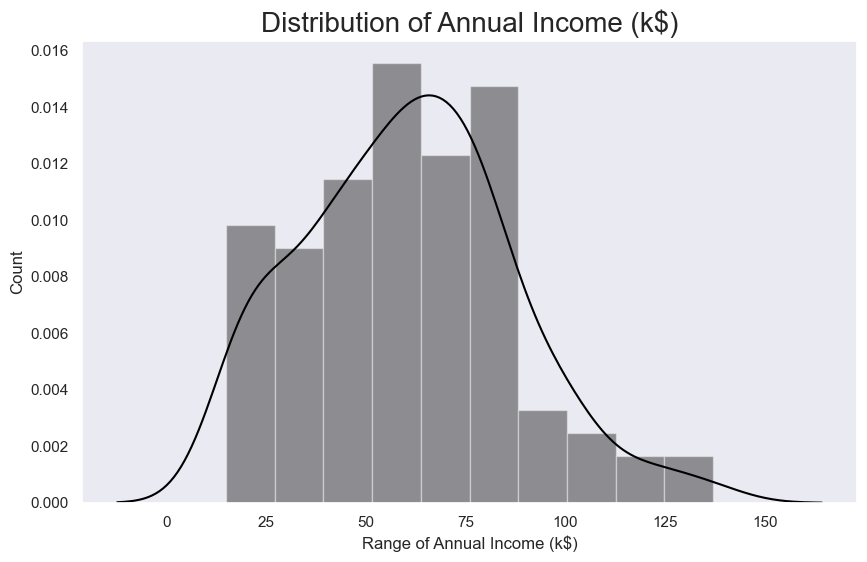

In [8]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'dark')
sns.distplot(df['Annual Income (k$)'], color='black')
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Most of the annual income falls between 50K to 85K.

Text(0, 0.5, 'Count')

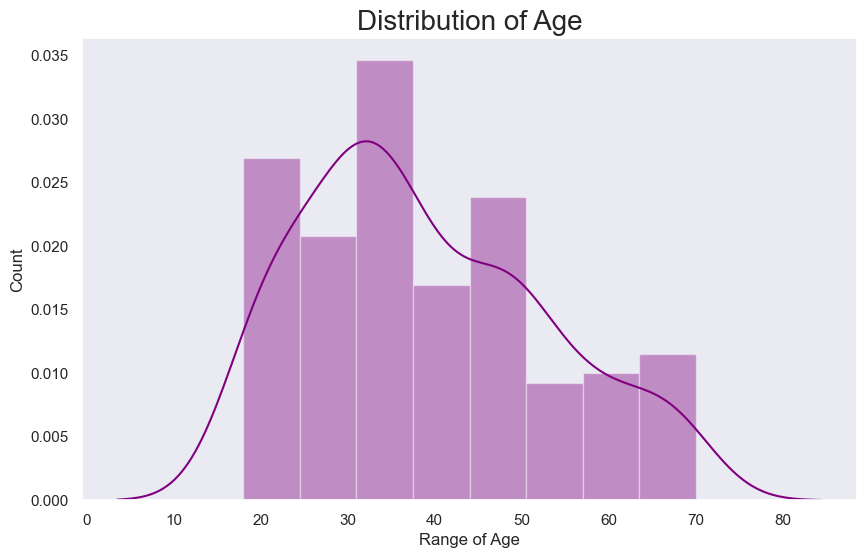

In [9]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'dark')
sns.distplot(df['Age'], color='purple')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

There are customers of a wide variety of ages.

Text(0, 0.5, 'Count')

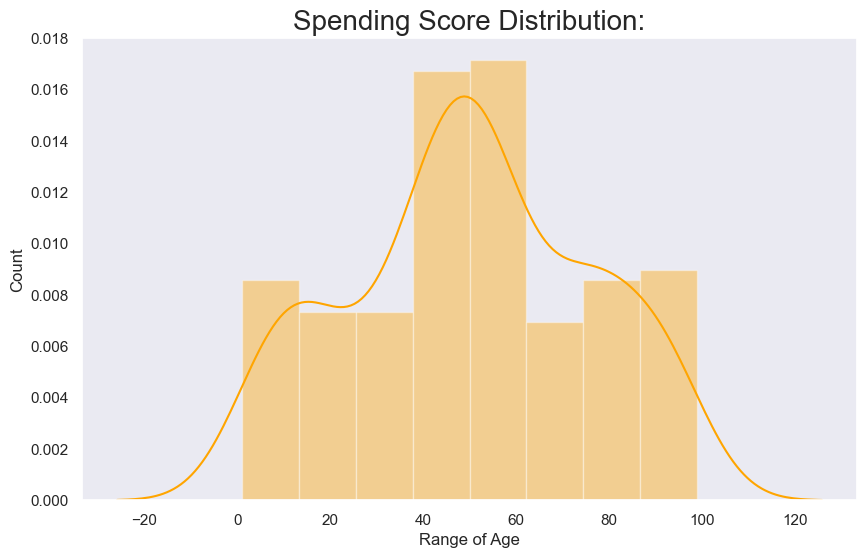

In [10]:
#Spending Score Distribution
plt.figure(figsize=(10, 6))
sns.set(style = 'dark')
sns.distplot(df['Spending Score (1-100)'], color='orange')
plt.title('Spending Score Distribution:', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

The maximum spending score is in the range of 40 to 60

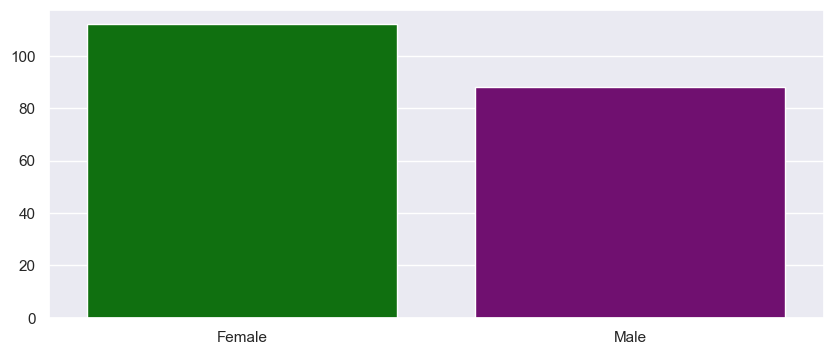

In [11]:
genders = df['Gender'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values, palette=['green', 'purple'])
plt.show()

More female customers than male.

In [12]:
dd= df.drop(['CustomerID', 'Gender', 'Age'], axis=1)
dd.head(6)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76


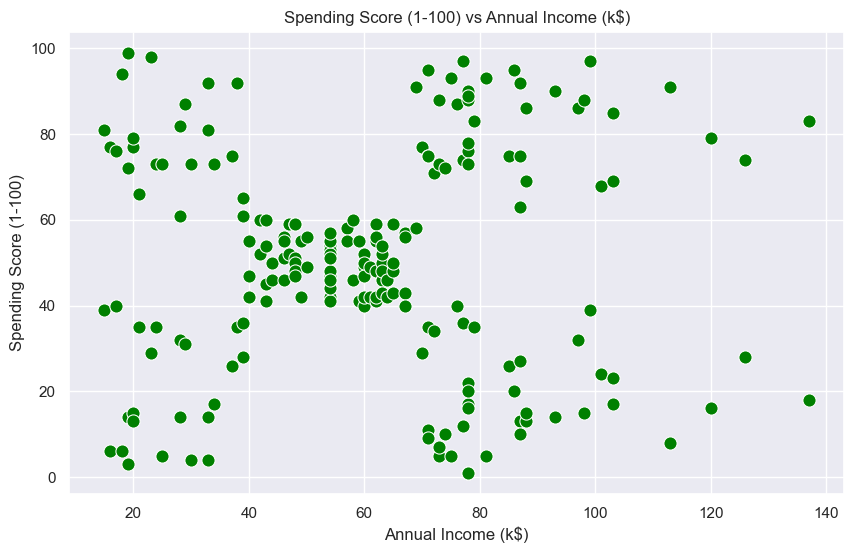

In [13]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = dd  ,s = 90 , color= 'green')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

#### Now we make the Elbow Plot for the best number of clusters to make from the raw data.

In [14]:
wcss=[]
krng= range(1,11)
for k in krng:
    km=KMeans(n_clusters=k)
    km.fit(dd)
    wcss.append(km.inertia_)

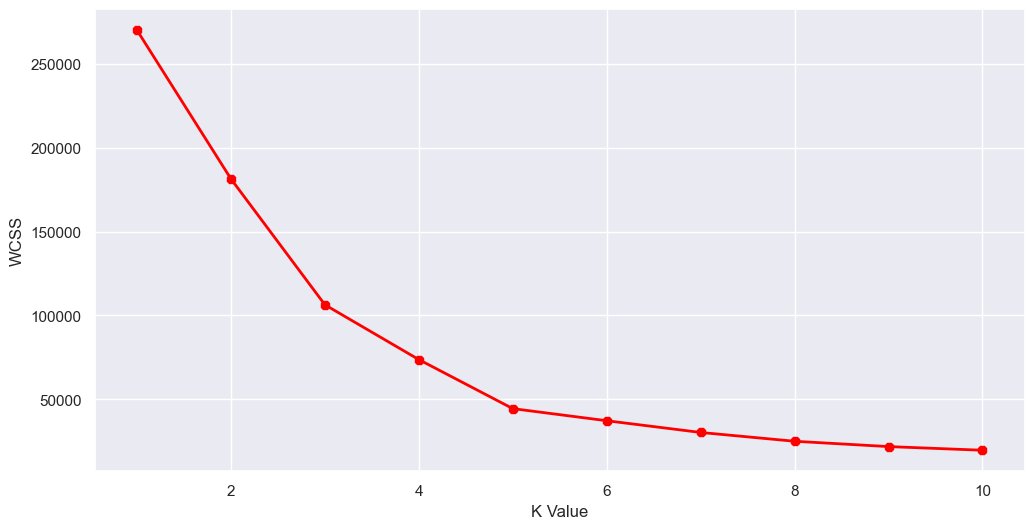

In [15]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(krng,wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

In [16]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
km1.fit(dd)
y=km1.predict(dd)

In [17]:
df["Cluster"] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Scatterplot of the clusters

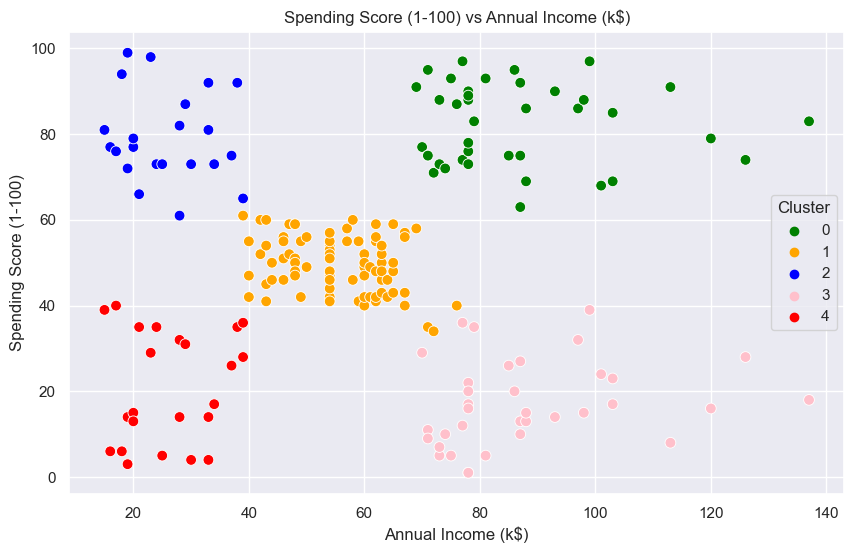

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['Annual Income (k$)'] ,y = df['Spending Score (1-100)'],hue=df["Cluster"],  
                 palette=['green','orange','blue','pink','red'], legend='full' ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### Summary
    We can clearly see that 5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score, similarly, the blue cluster is the customers with the most income and most spending score.So, we used K-Means clustering to understand customer data. K-Means is a good clustering algorithm. Almost all the clusters have similar density. It is also fast and efficient in terms of computational cost.